In [336]:
# TO IMPORT AND READ CSV FILES : (must run before any cell)
import pandas as pd
df = pd.read_csv('heart.csv')
print(df)
df = pd.read_csv('iris_dataset.csv')
print(df)
df = pd.read_csv('Selling_Price_Model.csv')
print(df)
df = pd.read_csv('Selling_Price_Model_Normalized.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [337]:
# Preprocess the data, check for dimensions, check for missing values etc

import numpy as np

df = pd.read_csv('heart.csv')
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData info:\n")
df.info()
print("\nStatistical summary:\n", df.describe())

Shape of dataset: (303, 14)

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (

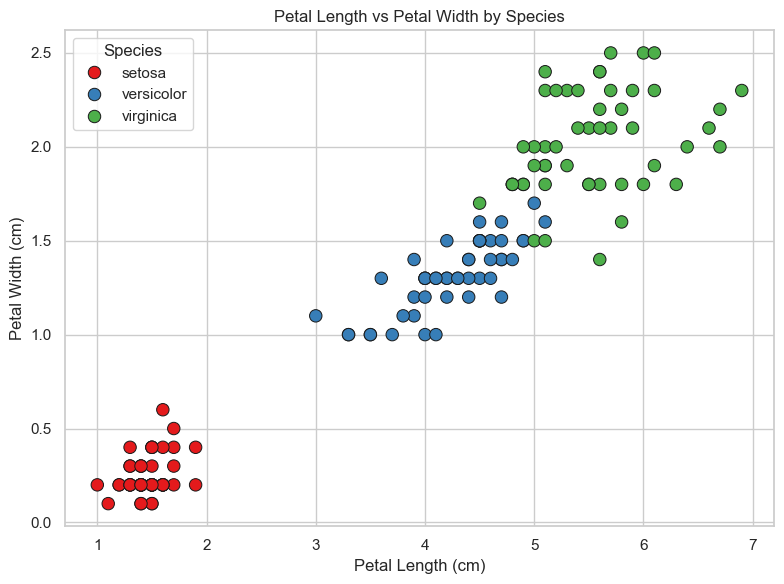

In [338]:
#Visualize Petal Length v/s Petal Width of different species

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset('iris') 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1', s=80, edgecolor='k')
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()

In [339]:
#Split the data into training and testing sets (80-20 split)

from sklearn.model_selection import train_test_split
import seaborn as sn

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)  
y = df['species']              
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training feature set shape: (120, 4)
Testing feature set shape: (30, 4)
Training labels shape: (120,)
Testing labels shape: (30,)


In [340]:
#Build the model using random forest algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



X_test shape: (30, 4)
y_test shape: (30,)
y_pred shape: (30,)


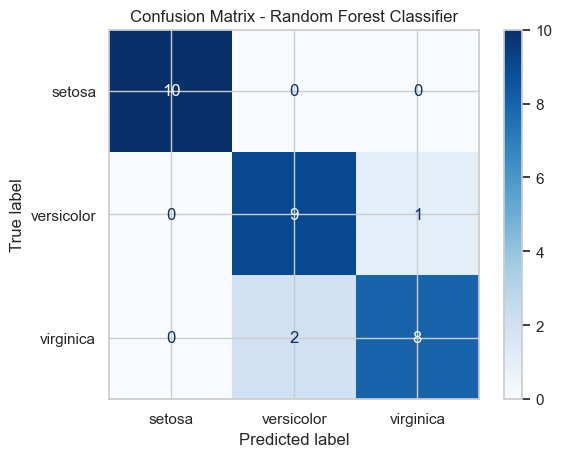

In [341]:
#Find the confusion matrix

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
y_pred = rf_model.predict(X_test)
print("y_pred shape:", y_pred.shape)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

In [342]:

#Determine accuracy of the model

from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")

Accuracy of the Random Forest model: 90.00%


In [343]:
#Handle missing values (using either imputation or removal).
from sklearn.impute import SimpleImputer
import pandas as pd

print(X.isnull().sum())
numeric_columns = X.select_dtypes(include=["float64", "int64"]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns
if len(numeric_columns) > 0:  
    numeric_imputer = SimpleImputer(strategy="mean")
    X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])
if len(categorical_columns) > 0:
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])
print(X.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [344]:
#Encode categorical features using appropriate encoding techniques (Label Encoding/One-Hot Encoding)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [345]:
#Normalize/scale the numerical features

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [346]:
#Train a linear regression model to predict the selling_price based on other features given (it is not error but warning)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Selling_Price_Model.csv")
print(df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))
X = df.drop(columns=['Selling Price']) 
y = df['Selling Price']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

Product ID       0
Product Name     0
Cost Price       0
Markup (%)       0
Quantity         0
Selling Price    0
Total Revenue    0
dtype: int64
R² Score: 0.561
RMSE: 10.30


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


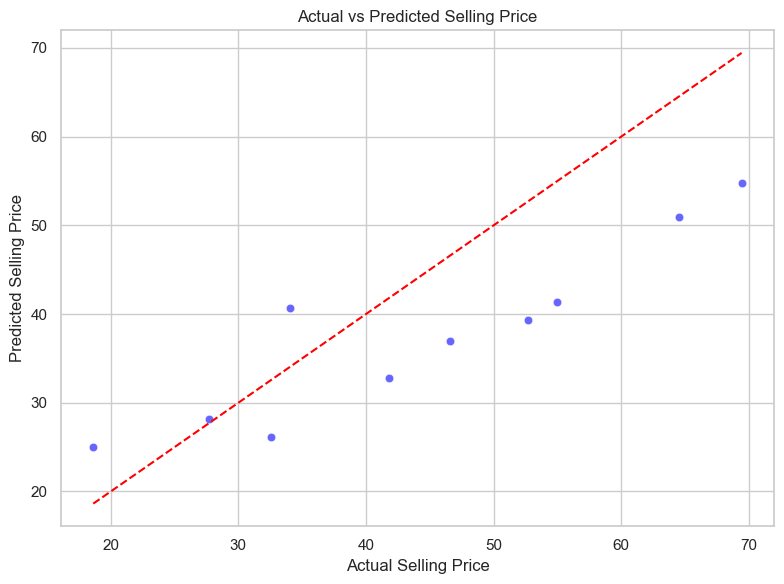

In [347]:
#Plot the regression line on the data and explain how well the model fits the data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [348]:
# Evaluate the model’s performance using Mean Squared Error (MSE)
   
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 106.05


In [349]:
# Split the data into training and testing sets (80-20 split)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [350]:
#Train a decision tree classifier on the training set

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 9.62
R² Score: 0.960


In [351]:
# Evaluate the model using accuracy, precision, recall, and F1-score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.960
Mean Absolute Error: 2.96
Root Mean Squared Error: 3.10


In [352]:
#Preprocess the data (e.g., normalize features if necessary)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = df.fillna(df.mean(numeric_only=True))
df = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
X = df.drop(columns=['Selling Price'])
y = df['Selling Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [353]:
#Train a decision tree classifier on the dataset
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

df = df.fillna(df.mean(numeric_only=True))
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=['Selling Price'])
y = df['Selling Price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error (MSE): 0.04
R² Score: 0.947


In [354]:
#Calculate the accuracy of the model by comparing predicted labels

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.947
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20


In [355]:
# Preprocess the data (e.g., checking for missing values).

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Selling_Price_Model.csv")
print("Missing values:\n", df.isnull().sum())
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
for col in categorical_columns:
    mode_value = df[col].mode()
    if not mode_value.empty:
        df[col] = df[col].fillna(mode_value.iloc[0])
df = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
if 'Selling Price' in df.columns:
    X = df.drop(columns=['Selling Price'])
    y = df['Selling Price']
else:
    raise KeyError("'Selling Price' column not found. Check column names with df.columns.")

Missing values:
 Product ID       0
Product Name     0
Cost Price       0
Markup (%)       0
Quantity         0
Selling Price    0
Total Revenue    0
dtype: int64


Skewness of numerical features:
 Cost Price       0.458007
Markup (%)       0.258907
Quantity         0.000000
Selling Price    0.459920
Total Revenue    0.545420
dtype: float64


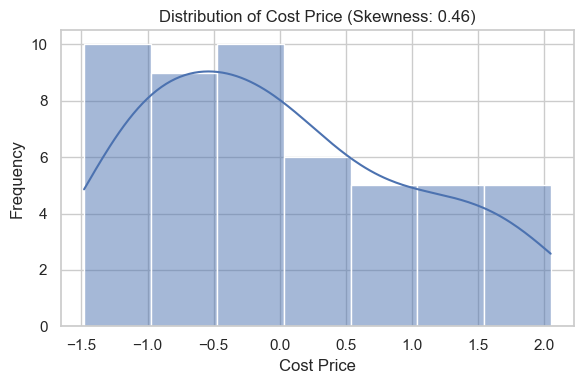

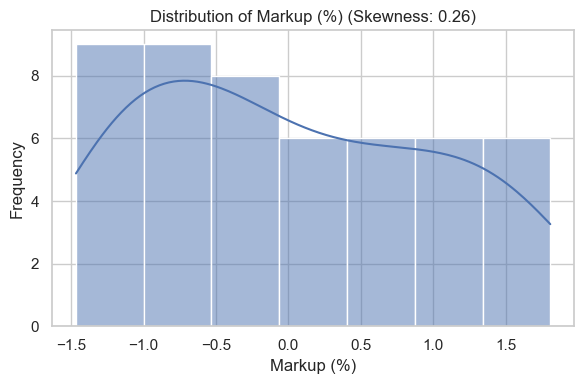

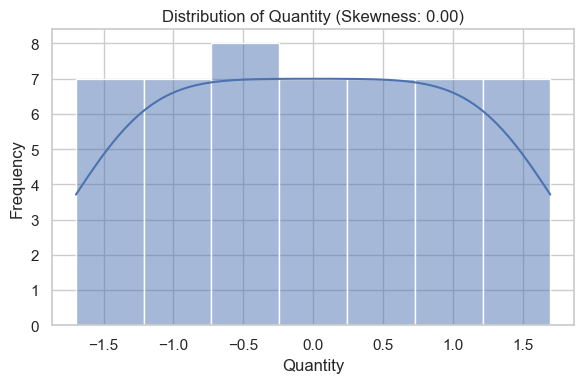

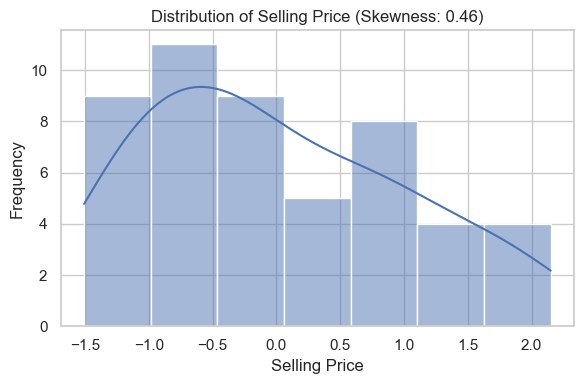

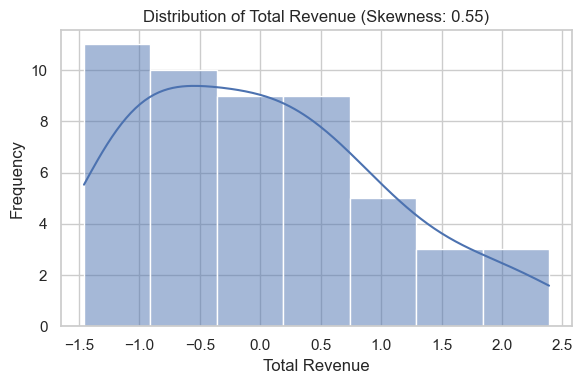

In [356]:
# Test for dataset skewness

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64'])
skewness = numerical_columns.skew()
print("Skewness of numerical features:\n", skewness)
for col in numerical_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Column Names and Data Types:

Cost Price                float64
Markup (%)                float64
Quantity                  float64
Selling Price             float64
Total Revenue             float64
                           ...   
Product Name_Product V       bool
Product Name_Product W       bool
Product Name_Product X       bool
Product Name_Product Y       bool
Product Name_Product Z       bool
Length: 79, dtype: object

First 5 Rows of the Dataset:
   Cost Price  Markup (%)  Quantity  Selling Price  Total Revenue  \
0   -1.480021   -1.466718 -1.697749      -1.507887      -1.457452   
1   -1.373031   -1.303021 -1.628453      -1.404451      -1.414317   
2   -1.266042   -1.139325 -1.559158      -1.299350      -1.366431   
3   -1.159052   -0.975629 -1.489862      -1.192586      -1.313695   
4   -1.052063   -0.811933 -1.420566      -1.084158      -1.256008   

   Product ID_P002  Product ID_P003  Product ID_P004  Product ID_P005  \
0            False            False            False

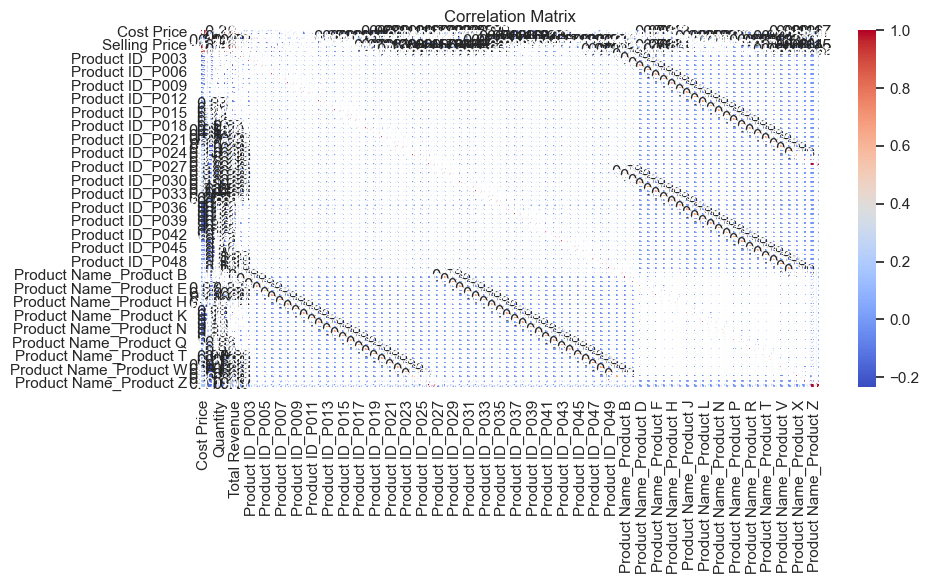

In [357]:
#Explore the features of dataset

import seaborn as sns
import matplotlib.pyplot as plt

print("Column Names and Data Types:\n")
print(df.dtypes)
print("\nFirst 5 Rows of the Dataset:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nUnique Value Counts per Column:")
for col in df.columns:
   print(f"{col}: {df[col].nunique()} unique values")
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
if 'selling_price' in df.columns:
    sns.histplot(df['selling_price'], kde=True)
    plt.title("Distribution of Selling Price")
    plt.xlabel("Selling Price")
    plt.ylabel("Frequency")
    plt.show()


In [358]:
# Preprocess the data (e.g., normalize features if necessary)

df = pd.read_csv('Selling_Price_Model_Normalized.csv')
print(df)

   Product ID Product Name  Cost Price  Markup (%)  Quantity  Selling Price  \
0        P001    Product A    0.000000        0.00  0.000000       0.000000   
1        P002    Product B    0.030303        0.05  0.020408       0.028283   
2        P003    Product C    0.060606        0.10  0.040816       0.057022   
3        P004    Product D    0.090909        0.15  0.061224       0.086215   
4        P005    Product E    0.121212        0.20  0.081633       0.115863   
5        P006    Product F    0.151515        0.25  0.102041       0.145966   
6        P007    Product G    0.181818        0.30  0.122449       0.176524   
7        P008    Product H    0.212121        0.35  0.142857       0.207537   
8        P009    Product I    0.242424        0.40  0.163265       0.239005   
9        P010    Product J    0.272727        0.45  0.183673       0.270928   
10       P011    Product K    0.303030        0.50  0.204082       0.303306   
11       P012    Product L    0.333333        0.55  

In [359]:
#Train a KNN classifier on the dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

if 'Product ID' in df.columns:
    df = df.drop(columns=['Product ID'])
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])
print("\nAll columns should now be numeric:")
print(df.dtypes)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(columns=['Selling Price']) 
y = df['Selling Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


All columns should now be numeric:
Product Name        int32
Cost Price        float64
Markup (%)        float64
Quantity          float64
Selling Price     float64
Annual Income     float64
Spending Score      int64
age                 int64
dtype: object
Mean Squared Error: 0.013377243864166138
R-squared: 0.7590817803563554


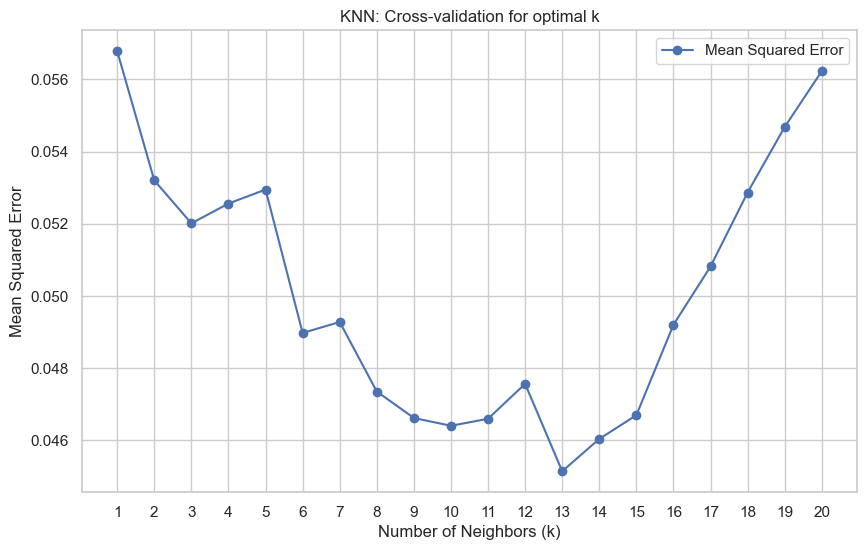

Optimal k value: 13


In [360]:
#Find the optimal number of neighbors (k) using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X = df.drop(columns=['Selling Price'])
y = df['Selling Price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores)) 
plt.figure(figsize=(10, 6))
plt.plot(k_values, -np.array(cv_scores), marker='o', color='b', label='Mean Squared Error')
plt.title('KNN: Cross-validation for optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k value: {optimal_k}")

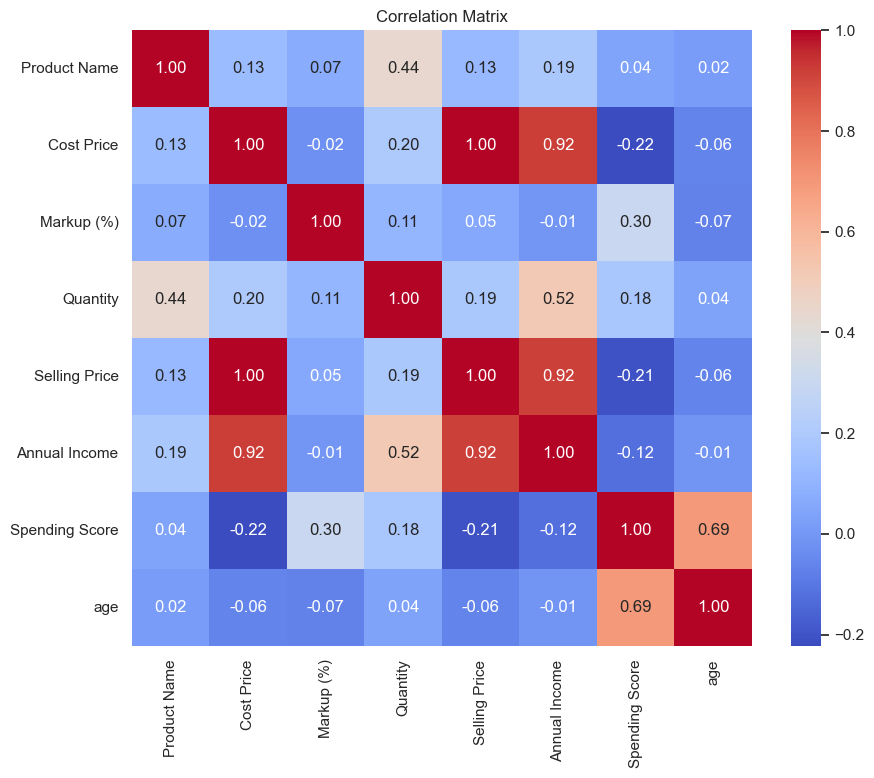

Summary Statistics:
        Product Name  Cost Price  Markup (%)   Quantity  Selling Price  \
count     50.000000   50.000000   50.000000  50.000000      50.000000   
mean      12.020000    0.419192    0.448000   0.500000       0.412311   
std        7.319223    0.286109    0.308545   0.297498       0.276212   
min        0.000000    0.000000    0.000000   0.000000       0.000000   
25%        6.000000    0.186869    0.200000   0.250000       0.195538   
50%       12.000000    0.373737    0.400000   0.500000       0.364877   
75%       18.000000    0.628788    0.700000   0.750000       0.612963   
max       25.000000    1.000000    1.000000   1.000000       1.000000   

       Annual Income  Spending Score        age  
count      50.000000       50.000000  50.000000  
mean        0.378921       50.780000  44.320000  
std         0.262629       24.917243  15.037966  
min         0.000000       11.000000  20.000000  
25%         0.159302       32.000000  32.000000  
50%         0.348468 

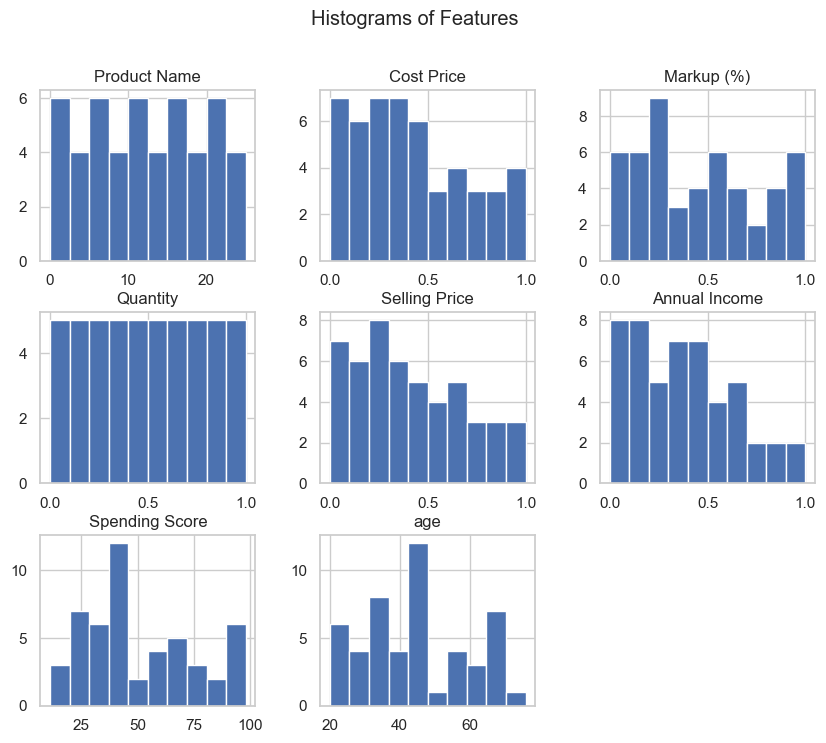

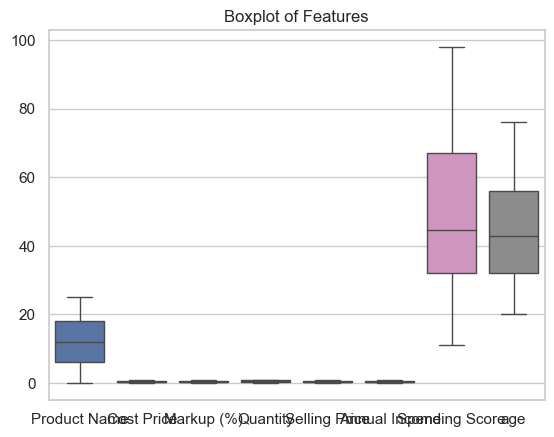


Skewness of Features:
 Product Name      0.016889
Cost Price        0.458007
Markup (%)        0.258907
Quantity          0.000000
Selling Price     0.459920
Annual Income     0.545420
Spending Score    0.398811
age               0.328132
dtype: float64

Kurtosis of Features:
 Product Name     -1.178238
Cost Price       -0.863030
Markup (%)       -1.182291
Quantity         -1.200000
Selling Price    -0.787918
Annual Income    -0.448116
Spending Score   -0.866022
age              -0.886976
dtype: float64
T-test: t-statistic = nan, p-value = nan


In [361]:
# Perform statistical analysis on data

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

summary = df.describe()
data_types = df.dtypes
missing_values = df.isnull().sum()
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
print("Summary Statistics:\n", summary)
print("\nData Types:\n", data_types)
print("\nMissing Values:\n", missing_values)
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()
skewness = df.skew()
kurtosis = df.kurt()
print("\nSkewness of Features:\n", skewness)
print("\nKurtosis of Features:\n", kurtosis)
from scipy import stats
group1 = df[df['Product Name'] == 'A']['Selling Price']
group2 = df[df['Product Name'] == 'B']['Selling Price']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

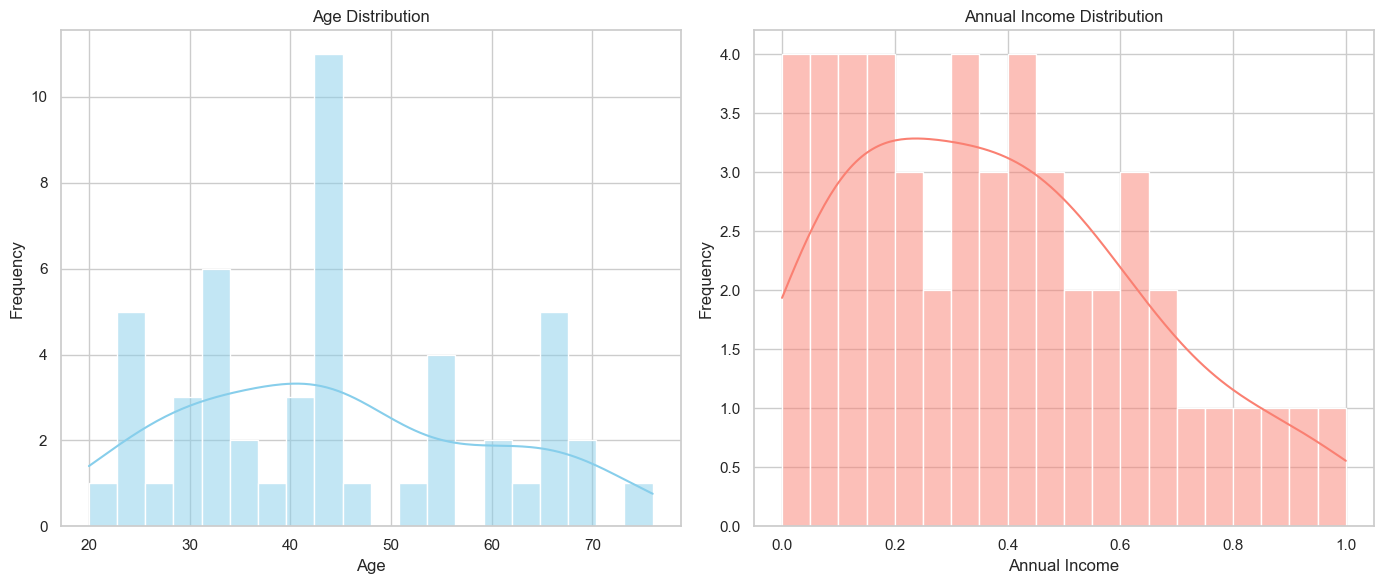

In [362]:
#Plot the graph of age and annual income distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df['Annual Income'], kde=True, bins=20, color='salmon')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


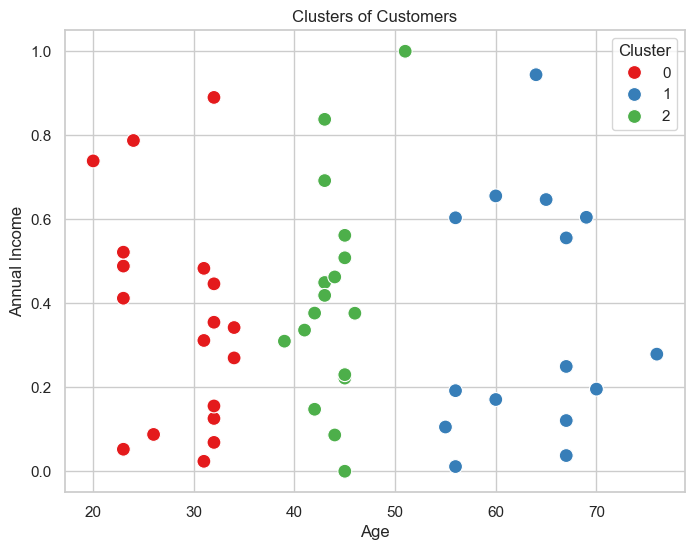

In [363]:
#Visualize the clusters formed by the algorithm (it is not error but warning)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

X = df[['age', 'Annual Income']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='Annual Income', hue='Cluster', palette='Set1', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [364]:
#Encode the target

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['Selling Price'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {0.0: 0, 0.028283288: 1, 0.030027298: 2, 0.057021535: 3, 0.061419472: 4, 0.086214741: 5, 0.093266606: 6, 0.115862906: 7, 0.125568699: 8, 0.14596603: 9, 0.158325751: 10, 0.176524113: 11, 0.191537762: 12, 0.207537155: 13, 0.225204732: 14, 0.236578708: 15, 0.239005156: 16, 0.259326661: 17, 0.266833485: 18, 0.270928116: 19, 0.297543221: 20, 0.303306036: 21, 0.328707916: 22, 0.336138914: 23, 0.360327571: 24, 0.369426752: 25, 0.392402184: 26, 0.403169548: 27, 0.424931756: 28, 0.437367304: 29, 0.457916288: 30, 0.472020018: 31, 0.507127692: 32, 0.542690325: 33, 0.573248408: 34, 0.578707916: 35, 0.606308766: 36, 0.615180467: 37, 0.639824082: 38, 0.652107977: 39, 0.673794359: 40, 0.708219594: 41, 0.743099788: 42, 0.778434941: 43, 0.814225053: 44, 0.850470124: 45, 0.887170155: 46, 0.924325144: 47, 0.961935093: 48, 1.0: 49}


In [365]:
#Find the highly correlated features

import numpy as np

corr_matrix = df.corr().abs()
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr_pairs = [
    (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
    for i in range(len(corr_matrix.columns))
    for j in range(i + 1, len(corr_matrix.columns))
    if corr_matrix.iloc[i, j] > 0.8
]
for col1, col2, corr_val in high_corr_pairs:
    print(f"{col1} and {col2} have a correlation of {corr_val:.2f}")

Cost Price and Selling Price have a correlation of 1.00
Cost Price and Annual Income have a correlation of 0.92
Cost Price and target_encoded have a correlation of 0.98
Selling Price and Annual Income have a correlation of 0.92
Selling Price and target_encoded have a correlation of 0.99
Annual Income and target_encoded have a correlation of 0.89


In [366]:
#Assign data and labels

X = df.drop(columns=['Selling Price'])
y = df['Selling Price']


In [367]:
#Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [371]:
# Train a Support Vector Machine (SVM) classifier on the data(if error is visible run it again)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
df['Cost Price'] = pd.qcut(df['Selling Price'], q=3, labels=['Low', 'Medium', 'High'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Cost Price'])
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         1
           2       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.87      0.89      0.85        10
weighted avg       0.88      0.80      0.81        10



In [374]:
#Perform hyperparameter tuning using GridSearchCV to find the best kernel and C parameter for the SVM model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'C': [0.1, 1, 10, 100] 
}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters found: ", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters found:  {'C': 0.1, 'kernel': 'linear'}
Best Model Accuracy: 0.8


In [373]:
#Report the best parameters and evaluate the model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C': [0.1, 1, 10, 100]  
}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters found: ", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters found:  {'C': 0.1, 'kernel': 'linear'}
Best Model Accuracy: 80.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         1
           2       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.87      0.89      0.85        10
weighted avg       0.88      0.80      0.81        10

